# introduction

this is a simple project to classify DNA sequences of human, chimpanzee, and dog. The dataset is downloaded from kaggle, the classes represent gene families 
```
0 label is for G protein-coupled receptors (GPCRs)
1 label is for Tyrosine kinase
2 label is for Tyrosine phosphatese
3 label is for Synthetase
4 label is for Synthase
5 label is for Ion channel
6 label is for Transcription factor
```
 

# import libraries

In [936]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score


# Read the dataset

In [977]:
human = pd.read_csv('human.txt', sep='\t')
chimp = pd.read_csv('chimpanzee.txt', sep='\t')
dog = pd.read_csv('dog.txt', sep='\t')

# preprocessing the dataset and EDA

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


In [979]:
human.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sequence  4380 non-null   object
 1   class     4380 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 68.6+ KB


In [980]:
chimp.head()


,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6


In [981]:
chimp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sequence  1682 non-null   object
 1   class     1682 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 26.4+ KB


In [982]:
dog.head()

,sequence,class
0,ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...,4
1,ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...,4
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0


In [983]:
dog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sequence  820 non-null    object
 1   class     820 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 12.9+ KB


Text(0.5, 1.0, 'Dog')

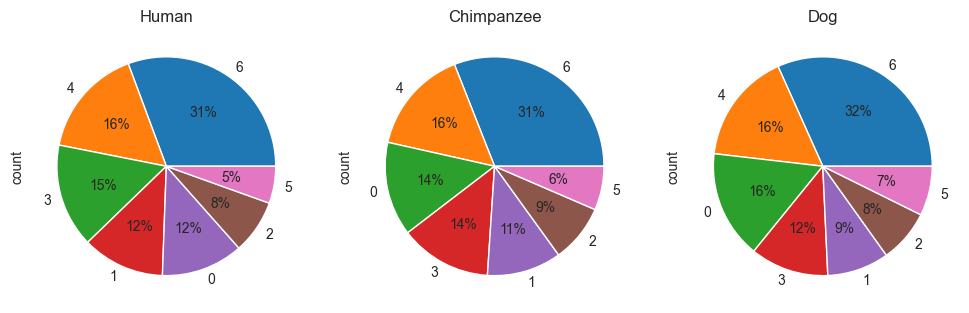

In [984]:
# make pie chart for each dataset in one figure
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
human['class'].value_counts().plot(kind='pie', autopct='%1.0f%%');
plt.title('Human')
plt.subplot(1, 3, 2)
chimp['class'].value_counts().plot(kind='pie', autopct='%1.0f%%');
plt.title('Chimpanzee')
plt.subplot(1, 3, 3)
dog['class'].value_counts().plot(kind='pie', autopct='%1.0f%%');
plt.title('Dog')


## calc the CG content

In [985]:
# Calc statistics of each dataset CG content, and the percentage of CG content in each sequence
def calcCG(sequence):
    return  f'{np.round((sequence.count("C") + sequence.count("G")) / len(sequence)*100)} %' 
chimp['CG'] = chimp['sequence'].apply(calcCG)
human['CG'] = human['sequence'].apply(calcCG)
dog['CG'] = dog['sequence'].apply(calcCG)


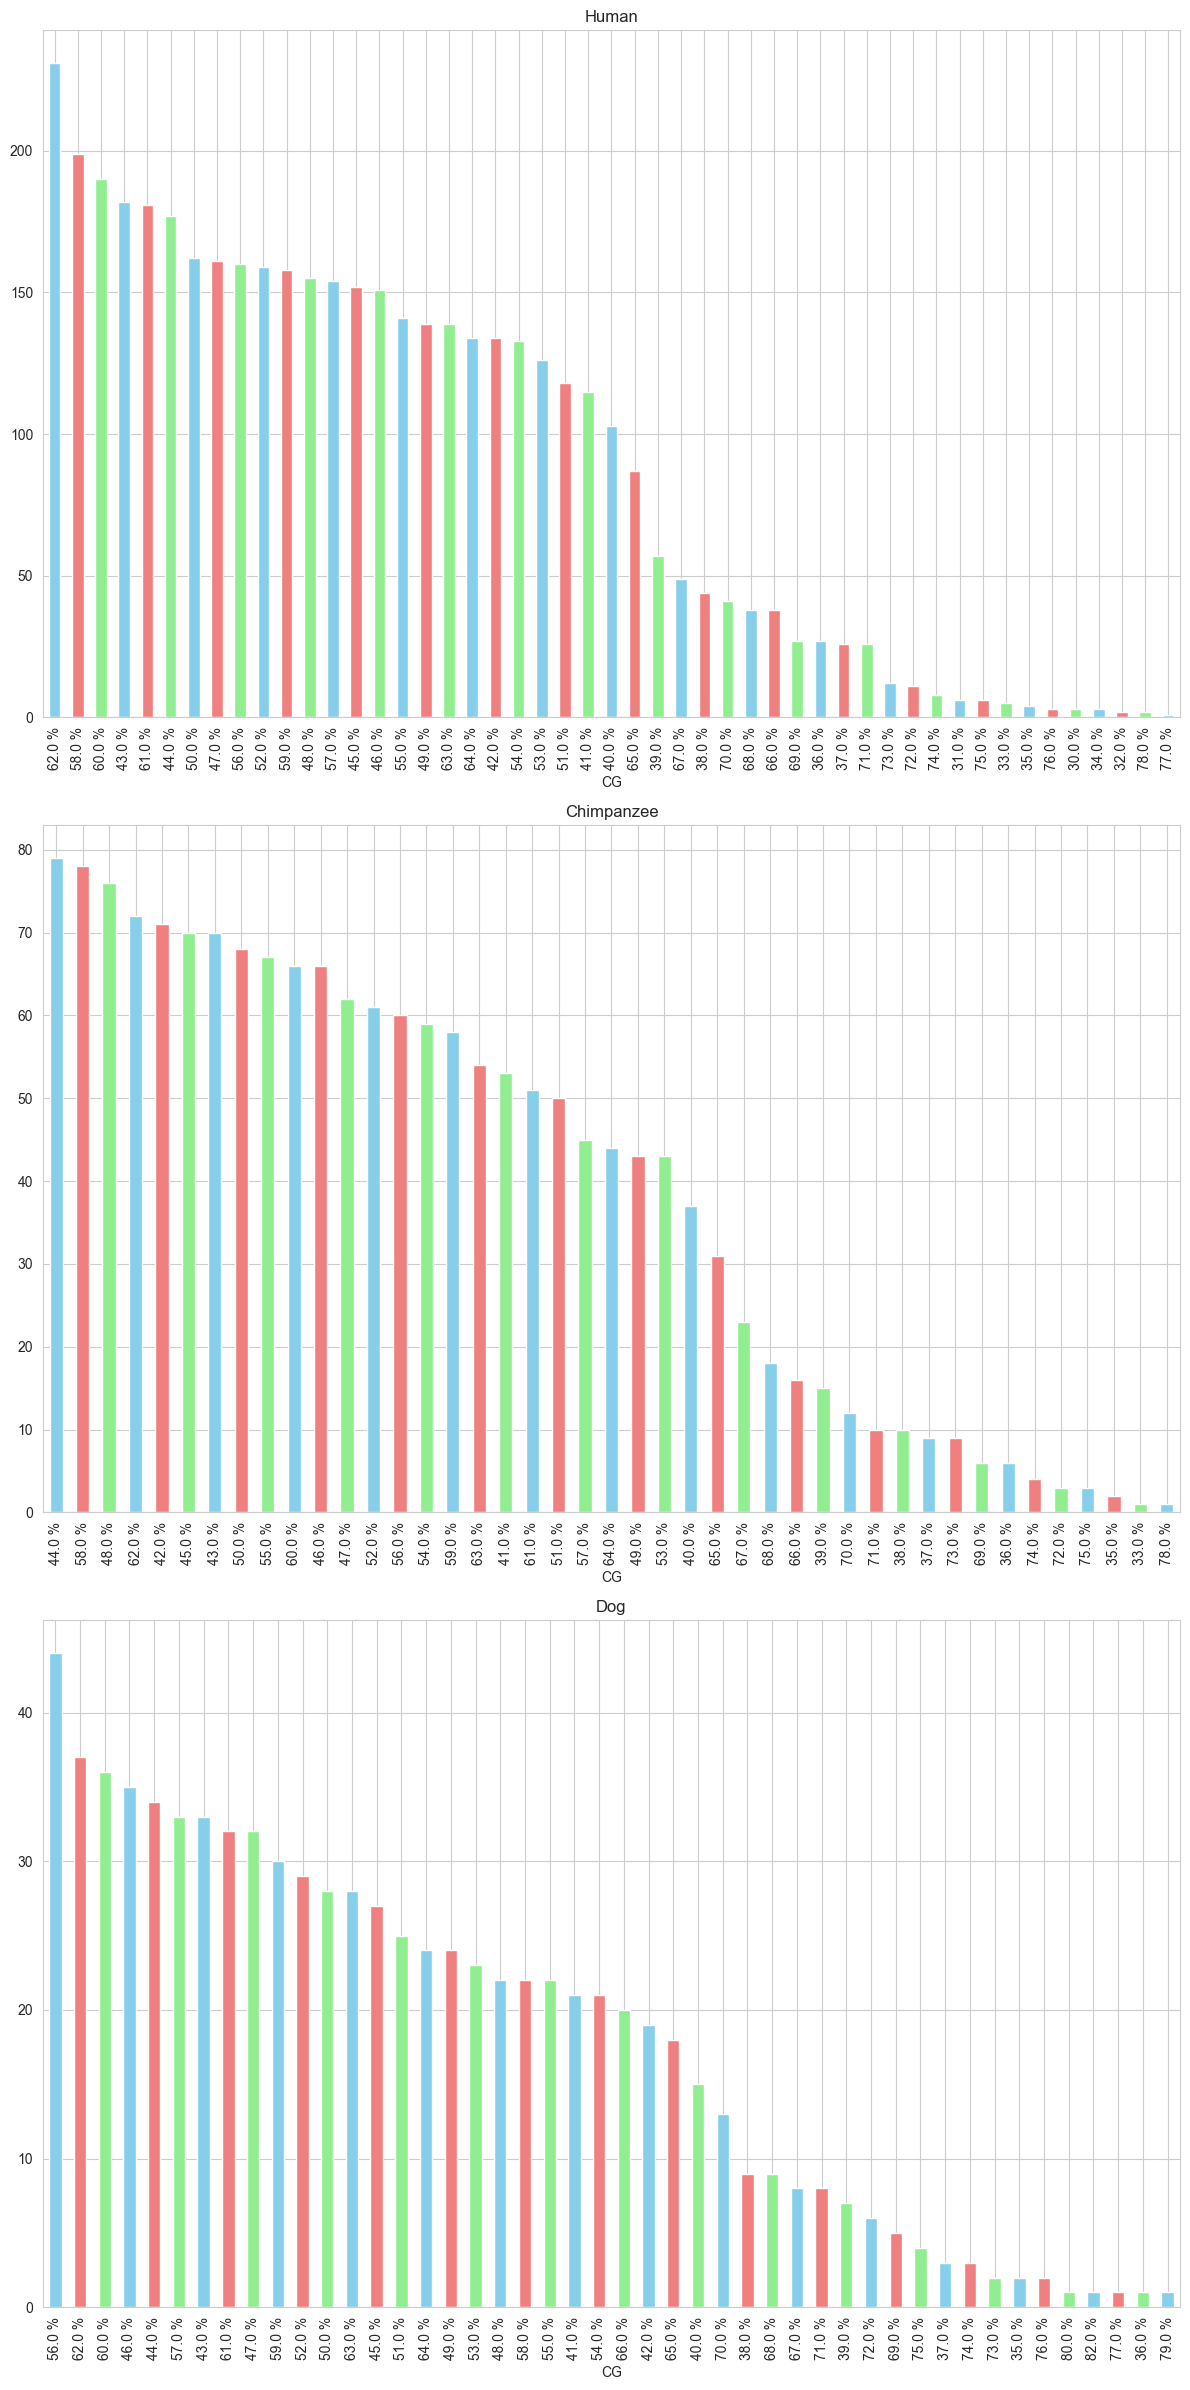

In [986]:
# plot the CG content in each dataset in three bar figures, one for each dataset, make each plot the blew the other

plt.figure(figsize=(12, 24))  # Adjust the height (24) to suit your needs

# Plot for Human
plt.subplot(3, 1, 1)  # 3 rows, 1 column, position 1
human['CG'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Human')

# Plot for Chimpanzee
plt.subplot(3, 1, 2)  # 3 rows, 1 column, position 2
chimp['CG'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Chimpanzee')

# Plot for Dog
plt.subplot(3, 1, 3)  # 3 rows, 1 column, position 3
dog['CG'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Dog')

plt.tight_layout()  # Adjust spacing to avoid overlapping
plt.show()


## Calc the percentage of each nucleotide in each sequence

In [987]:
# clac the percentage of each nucleotide in each sequence
def calcNucleotide(sequence, nucleotide):
    return f'{np.round(sequence.count(nucleotide) / len(sequence)*100)} %'


In [988]:
# calc the percentage of each nucleotide in each sequence
human['A'] = human['sequence'].apply(lambda x: calcNucleotide(x, 'A'))
human['T'] = human['sequence'].apply(lambda x: calcNucleotide(x, 'T'))
human['G'] = human['sequence'].apply(lambda x: calcNucleotide(x, 'G'))
human['C'] = human['sequence'].apply(lambda x: calcNucleotide(x, 'C'))


In [989]:
# calc the percentage of each nucleotide in each sequence
chimp['A'] = chimp['sequence'].apply(lambda x: calcNucleotide(x, 'A'))
chimp['T'] = chimp['sequence'].apply(lambda x: calcNucleotide(x, 'T'))
chimp['G'] = chimp['sequence'].apply(lambda x: calcNucleotide(x, 'G'))
chimp['C'] = chimp['sequence'].apply(lambda x: calcNucleotide(x, 'C'))

In [990]:
# calc the percentage of each nucleotide in each sequence in dog dataset
dog['A'] = dog['sequence'].apply(lambda x: calcNucleotide(x, 'A'))
dog['T'] = dog['sequence'].apply(lambda x: calcNucleotide(x, 'T'))
dog['G'] = dog['sequence'].apply(lambda x: calcNucleotide(x, 'G'))
dog['C'] = dog['sequence'].apply(lambda x: calcNucleotide(x, 'C'))  

In [991]:
human.head()

,sequence,class,CG,A,T,G,C
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4,40.0 %,39.0 %,22.0 %,6.0 %,33.0 %
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4,44.0 %,30.0 %,26.0 %,10.0 %,34.0 %
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,43.0 %,28.0 %,29.0 %,23.0 %,20.0 %
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,42.0 %,28.0 %,30.0 %,24.0 %,17.0 %
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3,43.0 %,29.0 %,28.0 %,23.0 %,20.0 %


In [992]:
chimp.head()

,sequence,class,CG,A,T,G,C
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4,40.0 %,38.0 %,22.0 %,7.0 %,33.0 %
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4,44.0 %,30.0 %,26.0 %,11.0 %,33.0 %
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4,48.0 %,28.0 %,24.0 %,25.0 %,23.0 %
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4,48.0 %,28.0 %,24.0 %,25.0 %,23.0 %
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6,64.0 %,20.0 %,16.0 %,32.0 %,32.0 %


In [993]:
# drop CG, A, T, G, C columns from each dataset
human = human.drop(['CG', 'A', 'T', 'G', 'C'], axis=1)
chimp = chimp.drop(['CG', 'A', 'T', 'G', 'C'], axis=1)
dog = dog.drop(['CG', 'A', 'T', 'G', 'C'], axis=1)


## calc the k-mers to  make the dataset ready for vectorization



In [994]:
# calculate k-mers
def getKmers(sequence, size=9):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

In [995]:
human['words'] = human.apply(lambda x: getKmers(x['sequence']), axis=1)
human = human.drop('sequence', axis=1)

In [996]:
dog['words'] = dog.apply(lambda x: getKmers(x['sequence']), axis=1)
dog = dog.drop('sequence', axis=1)

In [997]:
chimp['words'] = chimp.apply(lambda x: getKmers(x['sequence']), axis=1)
chimp = chimp.drop('sequence', axis=1)

In [998]:
human_texts = list(human['words'])
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])

In [999]:
chimp_texts = list(chimp['words'])
for item in range(len(chimp_texts)):
    chimp_texts[item] = ' '.join(chimp_texts[item])
        

In [1000]:
dog_texts = list(dog['words'])
for item in range(len(dog_texts)):
    dog_texts[item] = ' '.join(dog_texts[item])
    

In [1001]:
y_h = human.iloc[:, 0].values

In [1002]:
y_d = dog.iloc[:, 0].values

In [1003]:
y_c = chimp.iloc[:, 0].values

In [1004]:
human_texts[1]

'atgaacgaa tgaacgaaa gaacgaaaa aacgaaaat acgaaaatc cgaaaatct gaaaatctg aaaatctgt aaatctgtt aatctgttc atctgttcg tctgttcgc ctgttcgct tgttcgctt gttcgcttc ttcgcttca tcgcttcat cgcttcatt gcttcattc cttcattca ttcattcat tcattcatt cattcattg attcattgc ttcattgcc tcattgccc cattgcccc attgccccc ttgccccca tgcccccac gcccccaca cccccacaa ccccacaat cccacaatc ccacaatcc cacaatcct acaatccta caatcctag aatcctagg atcctaggc tcctaggcc cctaggcct ctaggccta taggcctac aggcctacc ggcctaccc gcctacccg cctacccgc ctacccgcc tacccgccg acccgccgc cccgccgca ccgccgcag cgccgcagt gccgcagta ccgcagtac cgcagtact gcagtactg cagtactga agtactgat gtactgatc tactgatca actgatcat ctgatcatt tgatcattc gatcattct atcattcta tcattctat cattctatt attctattt ttctatttc tctatttcc ctatttccc tatttcccc atttccccc tttccccct ttccccctc tccccctct ccccctcta cccctctat ccctctatt cctctattg ctctattga tctattgat ctattgatc tattgatcc attgatccc ttgatcccc tgatcccca gatccccac atccccacc tccccacct ccccacctc cccacctcc ccacctcca cacctccaa acctccaaa cctccaaat ctccaaata tccaaatat

## vectorization using TF-IDF vectorizer

TF-IDF is a statistical measure that gives the rare words in a document a higher score and the most frequent words a lower score.

In [1005]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [1006]:
cv = TfidfVectorizer()

In [1007]:
X_h = cv.fit_transform(human_texts)

In [1008]:
X_d = cv.transform(dog_texts)6

In [1009]:
X_c = cv.transform(chimp_texts)

In [1010]:
print(X_h.shape)

(4380, 232414)


In [1011]:
print(X_c.shape)

(1682, 232414)


In [1012]:
print(X_d.shape)

(820, 232414)


## convert the labels dtypes to category type

In [1013]:
# convert the labels dtypes to category type
y_h = y_h.astype('str')
y_c = y_c.astype('str')
y_d = y_d.astype('str')

# Split the dataset into train and test and establish baseline

In [1014]:
from sklearn.model_selection import train_test_split
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_h, y_h, test_size=0.20, random_state=42)

In [1015]:
pd.DataFrame(y_train_h).value_counts(normalize=True).max()

0.307648401826484

We can see that the baseline is 0.30, so we need to get a better accuracy than this value

# Build the model

In [1016]:
from sklearn.naive_bayes import MultinomialNB

In [1017]:
classifier = MultinomialNB(alpha=0.1)

In [1018]:
classifier.fit(X_train_h, y_train_h) 

MultinomialNB(alpha=0.1)

# Evaluate the model

In [1019]:
p = classifier.predict(X_train_h)

In [1020]:
# print the accuracy
print("Accuracy: {:.2f}%".format(accuracy_score(y_train_h, p) * 100))

Accuracy: 99.91%


In [1021]:
y_pred_h = classifier.predict(X_test_h)               

In [1022]:
# print the accuracy    
print("Accuracy: {:.2f}%".format(accuracy_score(y_test_h, y_pred_h) * 100))

Accuracy: 97.72%


In [1023]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_h, y_pred_h)

<Axes: >

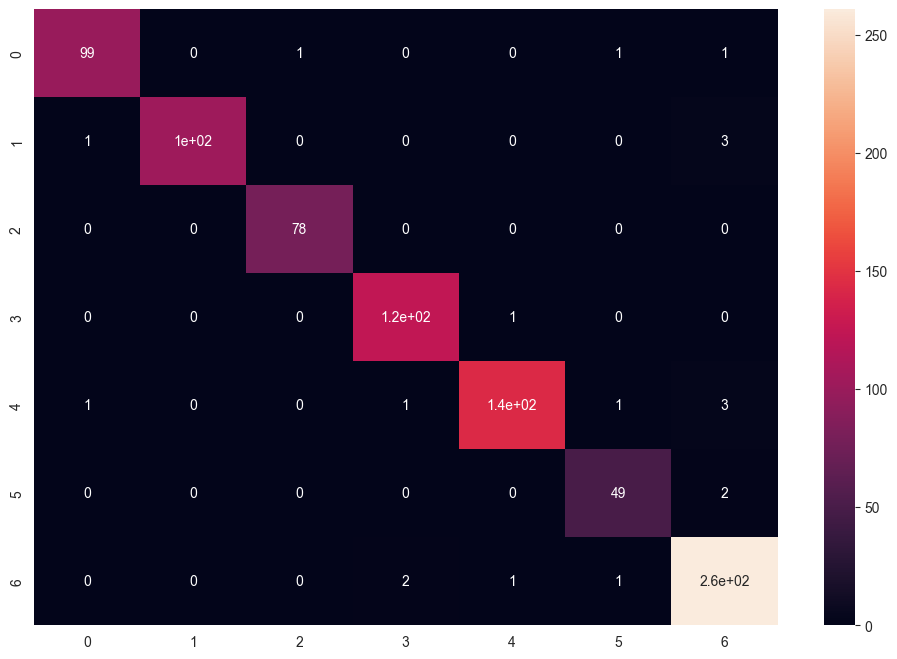

In [1024]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True)

In [1025]:
#import classification_report
from sklearn.metrics import classification_report

In [1026]:
# print classification report like a DataFrame
print(classification_report(y_test_h, y_pred_h))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       102
           1       1.00      0.96      0.98       106
           2       0.99      1.00      0.99        78
           3       0.98      0.99      0.98       125
           4       0.99      0.96      0.97       149
           5       0.94      0.96      0.95        51
           6       0.97      0.98      0.98       265

    accuracy                           0.98       876
   macro avg       0.98      0.98      0.98       876
weighted avg       0.98      0.98      0.98       876


In [1027]:
# make function to make prediction with classification report and confusion matrix and roc curve, two parameters are the data and the label of the data
def makePrediction(X, y):
    y_pred = classifier.predict(X)
    print("Accuracy: {:.2f}%".format(accuracy_score(y, y_pred) * 100))
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(12, 8))
    sns.heatmap(cm, annot=True)
    print(classification_report(y, y_pred))
    plt.show()

Accuracy: 99.29%
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       234
           1       1.00      0.99      1.00       185
           2       1.00      0.99      1.00       144
           3       1.00      1.00      1.00       228
           4       0.99      0.98      0.99       261
           5       0.96      1.00      0.98       109
           6       0.99      0.99      0.99       521

    accuracy                           0.99      1682
   macro avg       0.99      0.99      0.99      1682
weighted avg       0.99      0.99      0.99      1682


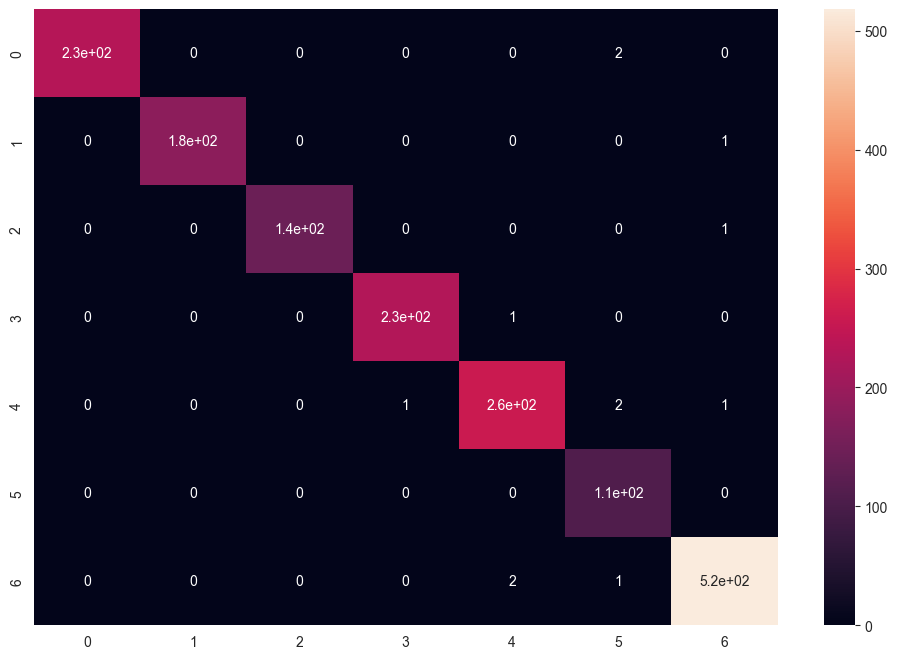

In [1028]:
makePrediction(X_c, y_c)

Accuracy: 93.90%
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       131
           1       1.00      0.87      0.93        75
           2       0.97      0.95      0.96        64
           3       0.98      0.92      0.95        95
           4       0.96      0.92      0.94       135
           5       0.82      0.90      0.86        60
           6       0.93      0.97      0.95       260

    accuracy                           0.94       820
   macro avg       0.94      0.93      0.93       820
weighted avg       0.94      0.94      0.94       820


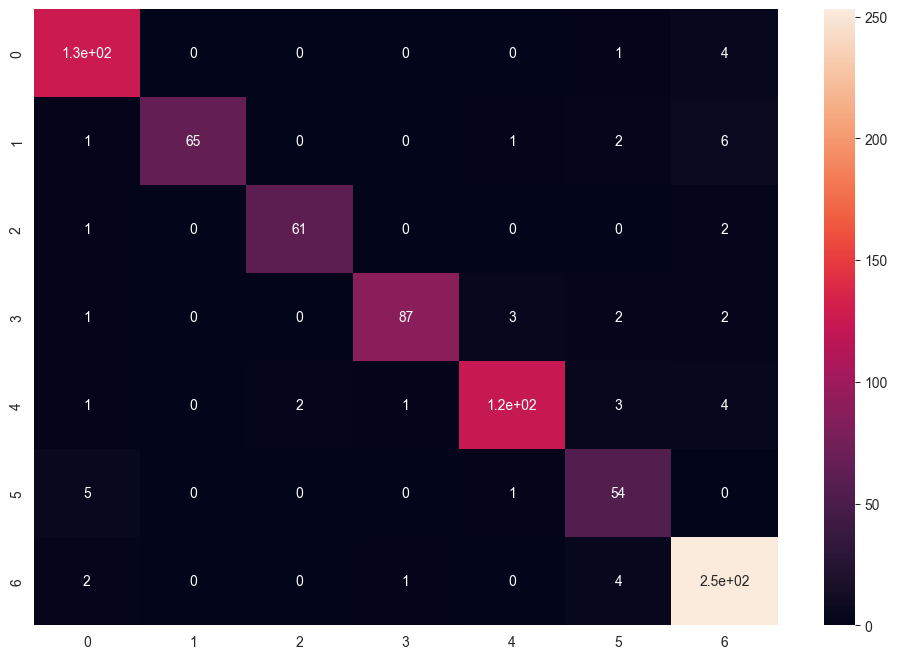

In [1029]:
makePrediction(X_d, y_d)

# Make inference on real data

In [1031]:
# import fasta file
from Bio import SeqIO


In [1037]:
file1=SeqIO.read('seq3.fasta','fasta')
file2=SeqIO.read('seq1&2.fasta','fasta')

In [1033]:
file1.seq

Seq('ATGAGGCAAGTGGCGAGAGTGATCGTGTTCCTGACCCTGAGTACTTTGAGCCTT...AAT')

In [1034]:
# make inference on the fasta file
def makeInference(sequence):
    sequence = getKmers(sequence)
    sequence = ' '.join(sequence)
    sequence = cv.transform([sequence])
    prediction = classifier.predict(sequence)
    if prediction == '0':
        return 'G protein-coupled receptors (GPCRs)'
    elif prediction == '1':
        return 'Tyrosine kinase'
    elif prediction == '2':
        return 'Tyrosine phosphatese'
    elif prediction == '3':
        return 'Synthetase'
    elif prediction == '4':
        return 'Synthase'
    elif prediction == '5':
        return 'Ion channel'
    elif prediction == '6':
        return 'Transcription factor'

In [1036]:
makeInference(pd.DataFrame({file1.seq}))

'Transcription factor'

In [1038]:
makeInference(pd.DataFrame({file2.seq}))

'Transcription factor'

# Conclusion

* We can see that accurcy of human dataset is 0.97, chimpanzee dataset is 0.99, and dog dataset is 0.93. So we can say that the model is good in classifying the DNA sequences of human, chimpanzee, and dog.
* the difference between champanzee genes and human genes is pertty similier, so the accurcy of predicting champ gene families is 99 %
*  the difference between dog and human genes similarity is low, so the accurcy of predicting dog gene families is 93 %, lower than champ 
